# Subplots

There is more than one way to do this!

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T14:52:58.537843


In [2]:
x = np.linspace(0,2*np.pi,10**3)
y = np.sin(x) + np.cos(x)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

## Standard Approach

### Default Layout

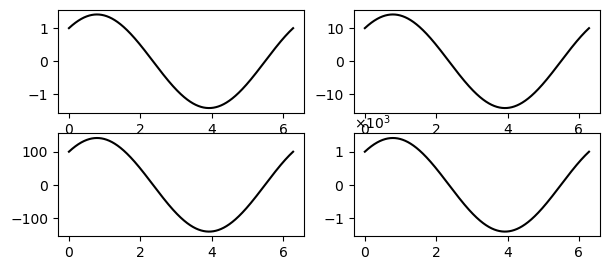

In [3]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
for ii,ax in enumerate(axes.ravel()):
    ax.plot(x,10**(ii)*y,'-k')
ax.yaxis.set_major_formatter(formatter) # Will always be the last one

### Automatic Spacing

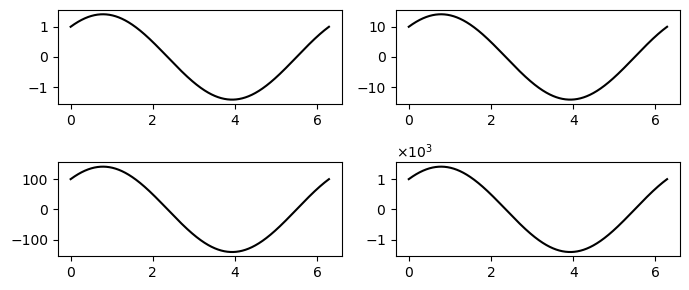

In [4]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
for ii,ax in enumerate(axes.ravel()):
    ax.plot(x,10**(ii)*y,'-k')
ax.yaxis.set_major_formatter(formatter) # Will always be the last one

fig.tight_layout()

### Manual

This example is not designed to look good. It is to show the results.

This comes from <http://stackoverflow.com/a/6541482>

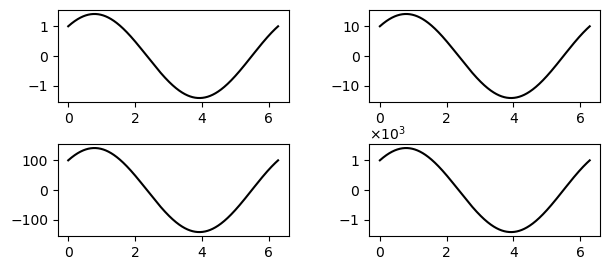

In [5]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,num=1)
for ii,ax in enumerate(axes.ravel()):
    ax.plot(x,10**(ii)*y,'-k')
ax.yaxis.set_major_formatter(formatter) # Will always be the last one


fig.subplots_adjust(hspace=0.45,wspace=0.35)

## All Options w/ examples
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

## Shared Axes with regular subplots

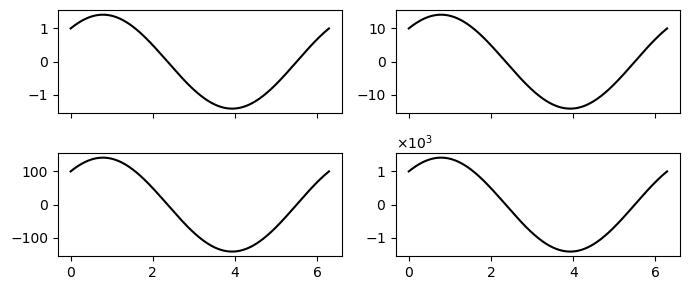

In [6]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True)
for ii,ax in enumerate(axes.ravel()):
    ax.plot(x,10**(ii)*y,'-k')
ax.yaxis.set_major_formatter(formatter) # Will always be the last one

fig.tight_layout()

You can also share the y-axis but it won't work welll on this example

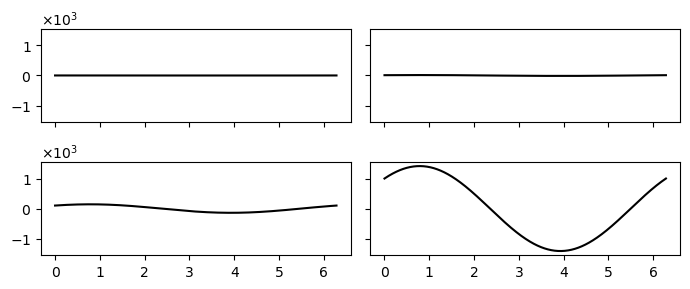

In [7]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True,sharey=True)
for ii,ax in enumerate(axes.ravel()):
    ax.plot(x,10**(ii)*y,'-k')
ax.yaxis.set_major_formatter(formatter) # Will always be the last one

fig.tight_layout()

## Fancy Subplots -- Gridspec

This is one of the ways to do it. Notice you need to manually save the axes

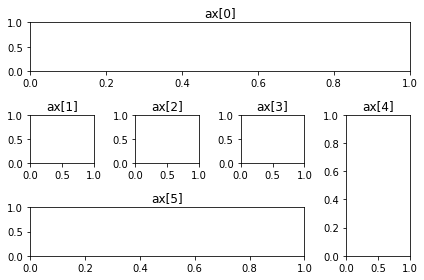

In [8]:
fig = plt.figure()

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)

ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)

ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title('ax[{}]'.format(ix))

fig.tight_layout()

## Fancy Subplots -- Manual

Less complex but less nice too!

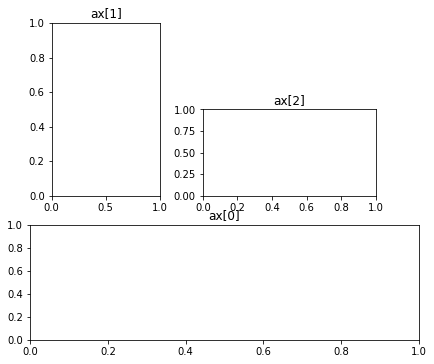

In [9]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1,0.1,0.9,0.4]) # Bottom
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6]) # They do not *need* to be in a grid
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
# DO NOT USE tightlayout()

## Fancy by adding or deleteing subplots


### Deletions

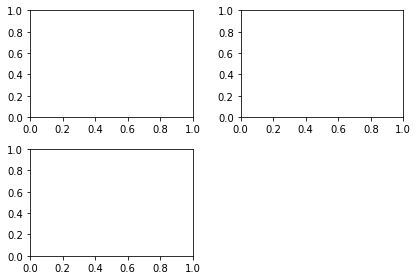

In [10]:
fig,axes = plt.subplots(2,2)
fig.delaxes(axes[1,1])
fig.tight_layout()

### Addition

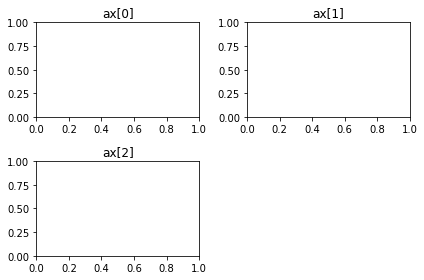

In [11]:
fig = plt.figure()

ax = [None for _ in range(3)]

ax[0] = fig.add_subplot(2,2,1)
ax[1] = fig.add_subplot(2,2,2)
ax[2] = fig.add_subplot(2,2,3)

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    
fig.tight_layout()

## No Spacing

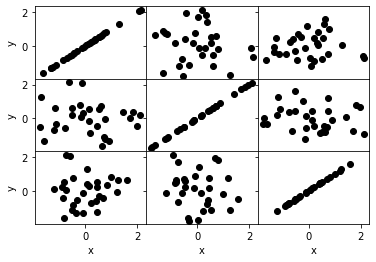

In [12]:
fig,axes = plt.subplots(3,3,sharex=True,sharey=True)

np.random.seed(282)
X = np.random.normal(size=(30,3))

import itertools
for ix,iy in itertools.product(range(3),range(3)):
    ax = axes[ix,iy]
    ax.plot(X[:,ix],X[:,iy],'ko')

for ax in axes[-1,:]:
    ax.set_xlabel('x')
for ax in axes[:,0]:
    ax.set_ylabel('y')

#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)
        

This is not a fully worked tool here but it gets the point across

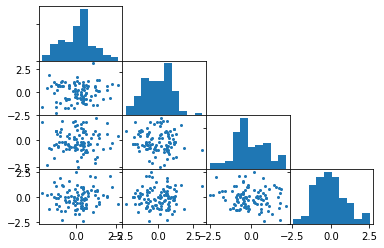

In [13]:
ndim = 4
fig,axes = plt.subplots(ndim,ndim)

np.random.seed(282)
X = np.random.normal(size=(100,ndim))

import itertools
lims = [None for _ in range(ndim)]
for jcol,irow in itertools.combinations_with_replacement(np.arange(ndim),2):
    ax = axes[irow,jcol]

    if jcol == irow:
        ax.hist(X[:,jcol])
        lims[jcol] == ax.get_xlim()
        ax.set_yticklabels([])
        if irow < (ndim-1):
            ax.set_xticklabels([])
    else:
        ax.plot(X[:,jcol],X[:,irow],'.',markersize=4)
        # Delete upper tri
        fig.delaxes(axes[jcol,irow])
        axes[jcol,irow] = None

# This isn't needed but it is to make it prettier
for jcol,irow in itertools.combinations(np.arange(ndim),2): # w/o replacement
    ax = axes[irow,jcol]
    ax.set_xlim(lims[jcol])
    ax.set_ylim(lims[irow])
    
    if jcol > 0:
        ax.set_yticklabels([])
    if irow < (ndim-1):
        ax.set_xticklabels([])
        
#fig.tight_layout(h_pad=0,w_pad=0)
fig.subplots_adjust(hspace=0,wspace=0)

## Text boxes outside subplots

Basically, just make a dummy axes and add to that. Note that you may want to do `tight_layout` first

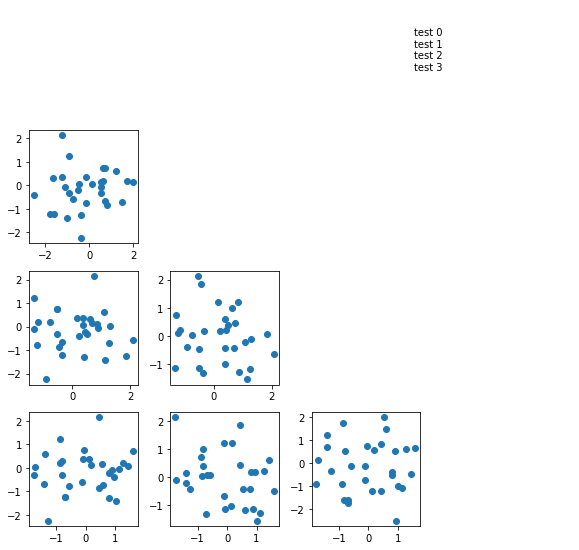

In [14]:
fig = plt.figure(figsize=(8,8))
n = 4

np.random.seed(282)
X = np.random.normal(size=(30,5))

axes = np.empty((n,n),dtype=object)
for jj,ii in itertools.combinations(np.arange(n),2):
    axes[ii,jj] = ax = fig.add_subplot(4,4,4*ii+jj + 1)
    ax.plot(X[:,ii],X[:,jj-1],'o')

# Call tight_layout first and then add others 
fig.tight_layout()

textax = fig.add_axes([0.5, 0.8,0.5,0.15])
textax.set_frame_on(False) # uncomment this while working on it.
textax.set(xticks=[],yticks=[])

# You do not need `transform=ax.transAxes` since there is nothing there!
text = textax.text(0.5,0.5,'\n'.join('test %d'%i for i in range(4)),
                   horizontalalignment='center',verticalalignment='center', )
   
        